In [138]:
from selenium.webdriver.common.by import By
from matplotlib import pyplot as plt
from selenium   import webdriver
from PIL        import Image, ImageOps 
from random     import randint,choice

import matplotlib.patches as patches
import numpy as np
import base64
import cv2

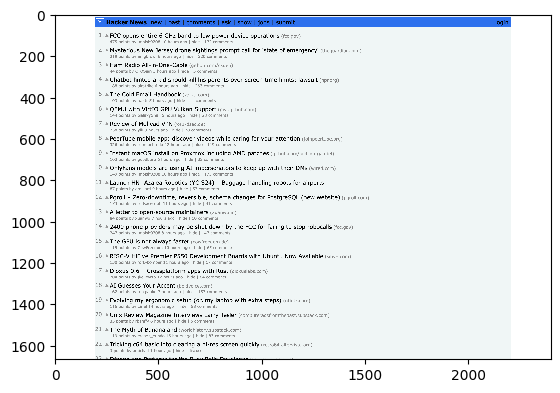

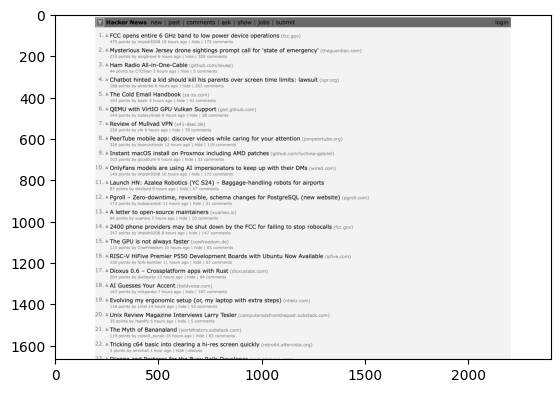

In [ ]:
driver = webdriver.Chrome()

driver.get("https://news.ycombinator.com/")

driver.save_screenshot('HackerNews.png')

# # image as bytes
bytes = driver.get_screenshot_as_png()

# # image as base64 string
base64_string = driver.get_screenshot_as_base64()

driver.quit()


nparr = np.frombuffer(bytes, np.uint8)
image_np = cv2.imdecode(nparr,cv2.IMREAD_COLOR) # cv2.IMREAD_COLOR -> (1666, 2400, 3)
image_np.shape

# creating a image1 object 
im1 = Image.fromarray(obj = image_np)
 
# applying grayscale method 
im2 = ImageOps.grayscale(im1) 


plt.imshow(image_np, interpolation='nearest')
plt.show()

grey_scale_img = np.array(im2)
plt.imshow(grey_scale_img, cmap='gray', vmin=0, vmax=255)
plt.show()

In [139]:
[randint(98,100) for _ in range(10)]

[99, 100, 99, 99, 100, 98, 99, 98, 99, 98]

In [ ]:
driver = webdriver.Chrome()

driver.get("https://news.ycombinator.com/")

driver.save_screenshot('products.png')

# # image as bytes
bytes = driver.get_screenshot_as_png()

# # image as base64 string
base64_string = driver.get_screenshot_as_base64()


# title = driver.title

# driver.implicitly_wait(0.5)

# text_box = driver.find_element(by=By.NAME, value="my-text")
# submit_button = driver.find_element(by=By.CSS_SELECTOR, value="button")

# text_box.send_keys("Selenium")
# submit_button.click()

# message = driver.find_element(by=By.ID, value="message")
# text = message.text

driver.quit()

In [ ]:
nparr = np.frombuffer(bytes, np.uint8)
image_np = cv2.imdecode(nparr,cv2.IMREAD_COLOR) # cv2.IMREAD_COLOR -> (1666, 2400, 3)
image_np.shape

In [ ]:
grey_scale_img = np.dot(image_np[...,:3], [0.299, 0.587, 0.114])
grey_scale_img.shape

In [ ]:
from PIL import Image, ImageOps 
     
# creating a image1 object 
im1 = Image.fromarray(obj = image_np)
 
# applying grayscale method 
im2 = ImageOps.grayscale(im1) 

In [ ]:
grey_scale_img = np.array(im2)

In [ ]:
grey_scale_img.shape

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(image_np, interpolation='nearest')
plt.show()

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(grey_scale_img, cmap='gray', vmin=0, vmax=255)
plt.show()

In [ ]:
#sample_string = "GeeksForGeeks is the best"
sample_string_bytes = base64_string.encode("ascii")
print(sample_string_bytes)

base64_bytes = base64.b64encode(s = bytes)
base64_string_ = base64_bytes.decode("ascii")

print(f"Encoded string: {base64_string_}")

In [ ]:
import requests
from bs4 import BeautifulSoup


# Making a GET request
r = requests.get('https://news.ycombinator.com/')

# check status code for response received
# success code - 200
#print(r)

# Parsing the HTML
soup = BeautifulSoup(r.content, 'html.parser')

# a = set()

# for child in soup.descendants:
#     if child.name:
#         a.add(child)

# for tag in soup.find_all('td'):
#     print(tag.text)
#print(soup.prettify())

In [93]:
r = requests.get('https://news.ycombinator.com/')
soup = BeautifulSoup(r.content, 'html.parser')
quote = soup.findAll("a")
quote = [str(item) for item in quote]
titles = [item for item in quote if item.startswith("<a href=\"https:")][1:-3]
titles

['<a href="https://docs.fcc.gov/public/attachments/DOC-408129A1.txt">FCC opens entire 6 GHz band to low power device operations</a>',
 '<a href="https://www.theguardian.com/us-news/2024/dec/11/new-jersey-drone-sightings-state-of-emergency">Mysterious New Jersey drone sightings prompt call for \'state of emergency\'</a>',
 '<a href="https://github.com/skuep/AIOC">Ham Radio All-in-One-Cable</a>',
 '<a href="https://gist.github.com/peppergrayxyz/fdc9042760273d137dddd3e97034385f">QEMU with VirtIO GPU Vulkan Support</a>',
 '<a href="https://www.npr.org/2024/12/10/nx-s1-5222574/kids-character-ai-lawsuit">Chatbot hinted a kid should kill his parents over screen time limits: lawsuit</a>',
 '<a href="https://www.za-zu.com/blog/playbook">The Cold Email Handbook</a>',
 '<a href="https://x41-dsec.de/news/2024/12/11/mullvad/">Review of Mullvad VPN</a>',
 '<a href="https://joinpeertube.org/news/peertube-app">PeerTube mobile app: discover videos while caring for your attention</a>',
 '<a href="https:

In [91]:
start_idx = len("<a href=\"")
end_idx    = len("</a>")
for idx,t in enumerate(titles):
    link, event_title = t[start_idx:-end_idx].split(">")
    print(f'{{"id": {idx},"link":"{link} ,"title":"{event_title}"}},')

{"id": 0,"link":"https://docs.fcc.gov/public/attachments/DOC-408129A1.txt" ,"title":"FCC opens entire 6 GHz band to low power device operations"},
{"id": 1,"link":"https://www.theguardian.com/us-news/2024/dec/11/new-jersey-drone-sightings-state-of-emergency" ,"title":"Mysterious New Jersey drone sightings prompt call for 'state of emergency'"},
{"id": 2,"link":"https://gist.github.com/peppergrayxyz/fdc9042760273d137dddd3e97034385f" ,"title":"QEMU with VirtIO GPU Vulkan Support"},
{"id": 3,"link":"https://www.npr.org/2024/12/10/nx-s1-5222574/kids-character-ai-lawsuit" ,"title":"Chatbot hinted a kid should kill his parents over screen time limits: lawsuit"},
{"id": 4,"link":"https://joinpeertube.org/news/peertube-app" ,"title":"PeerTube mobile app: discover videos while caring for your attention"},
{"id": 5,"link":"https://x41-dsec.de/news/2024/12/11/mullvad/" ,"title":"Review of Mullvad VPN"},
{"id": 6,"link":"https://github.com/luchina-gabriel/OSX-PROXMOX" ,"title":"Instant macOS insta

In [82]:
link

'https://docs.fcc.gov/public/attachments/DOC-408129A1.txt"'

In [ ]:
for item in a:
    print(f'item: {item}' + '*' * 50)
    for tag in soup.find_all(item):
        print(tag.text)